## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import cv2
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image


import tensorflow
from tensorflow import keras 
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split



In [3]:
# reading the csv file
data = pd.read_csv(r'train\train.csv')

In [4]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [5]:
# looking at first five rows of the data
data.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
# distribution of classes in the dataset
data['category'].value_counts()

1    2120
5    1217
2    1167
3     916
4     832
Name: category, dtype: int64

In [7]:
# redefine the categories
data['category'] = data['category'] - 1

In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image:
    # loading the image using its name
    img = cv2.imread(r"train\\images\\" + img_name)
    img = cv2.resize(img, dsize=(244,244))
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X, dtype='int')

# storing the target variable in separate variable
y = data.category.values

In [9]:
# shape of the image
X.shape

(6252, 244, 244, 3)

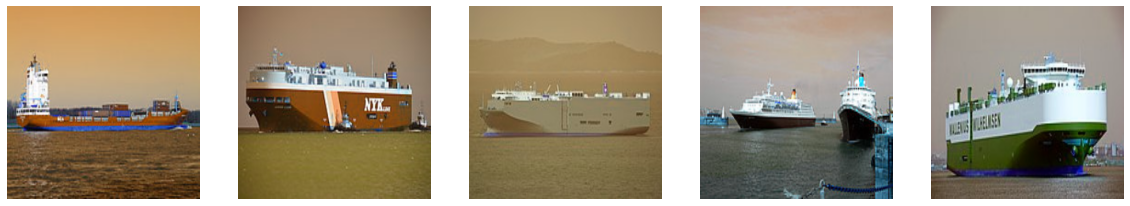

In [10]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

In [11]:
# normalizing the pixel values
X = X / X.max()

## 3. Creating training and validation set

In [12]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [13]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((4376, 244, 244, 3), (4376,)), ((1876, 244, 244, 3), (1876,)))

## 4. Defining the model architecture

In [14]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation,MaxPooling2D, Dropout

In [19]:
# Creating a Sequential model
model = Sequential([tensorflow.keras.layers.Input((244,244,3))])

# 1st Convolution Layer
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))


# 2nd Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))


# 3rd Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))


# 4th Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))


# 5th Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D((3,3), strides=(2,2), padding='valid'))


# Flattening before passing to the Dense layer
model.add(Flatten())


# 1st Dense Layer
model.add(Dense(4096))
# Dropout
model.add(Dropout(0.4))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))


# 2nd Dense Layer
model.add(Dense(4096))
# Dropout
model.add(Dropout(0.4))
# Normalization
model.add(BatchNormalization())
# Activation Function
model.add(Activation('relu'))


# Output softmax Layer
model.add(Dense(5))
# Activation Function
model.add(Activation('So'))

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_m,'accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_29 (ModuleWra (None, 59, 59, 96)        34944     
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 59, 59, 96)        384       
_________________________________________________________________
module_wrapper_31 (ModuleWra (None, 59, 59, 96)        0         
_________________________________________________________________
module_wrapper_32 (ModuleWra (None, 29, 29, 96)        0         
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 29, 29, 256)       614656    
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 29, 29, 256)       1024      
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 29, 29, 256)      

In [22]:
model_history = model.fit(X_train, y_train, epochs=2, batch_size=244,validation_data=(X_valid,y_valid))

Epoch 1/2
18/18 [==============================] - 312s 16s/step - loss: 1.7341 - f1_m: 1.5220 - accuracy: 0.3835 - val_loss: 41.8533 - val_f1_m: 0.7998 - val_accuracy: 0.1498
Epoch 2/2
18/18 [==============================] - 256s 14s/step - loss: 1.1345 - f1_m: 1.3632 - accuracy: 0.5494 - val_loss: 45.7679 - val_f1_m: 0.7998 - val_accuracy: 0.1498


In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Another

In [37]:
# defining the architecture of the model

model =Sequential([
    tensorflow.keras.layers.Input((244,244,3)),
    tensorflow.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tensorflow.keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[f1_m,'accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 3)           27651     
_________________________________________________________________
flatten (Flatten)            (None, 147)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 740       
Total params: 3,257,255
Trainable params: 3,235,367
Non-trainable params: 21,888
_________________________________________________________________


## 5. Compiling the model

In [36]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

## 6. Training the model

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=5, batch_size=244,validation_data=(X_valid,y_valid))

## 7. Evaluating model performance

In [ ]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)
prediction_probabilities = model.predict(X_valid)

In [ ]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

## Testing

In [24]:
test_data = data = pd.read_csv(r'test_3w1q66B.csv')

In [25]:
# load images and store it in numpy array

# empty list to store the images
X_test = []
# iterating over each image
for img_name in test_data.image:
    # loading the image using its name
    img = cv2.imread(r"train\\images\\" + img_name)
    img = cv2.resize(img, dsize=(244,244))
    # saving each image in the list
    X_test.append(img)
    
# converting the list of images into array
X_test=np.array(X_test, dtype='int')

In [26]:
X_test.shape

(2680, 244, 244, 3)

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_29 (ModuleWra (None, 59, 59, 96)        34944     
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 59, 59, 96)        384       
_________________________________________________________________
module_wrapper_31 (ModuleWra (None, 59, 59, 96)        0         
_________________________________________________________________
module_wrapper_32 (ModuleWra (None, 29, 29, 96)        0         
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 29, 29, 256)       614656    
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 29, 29, 256)       1024      
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 29, 29, 256)      

In [28]:
preds=model.predict(X_test)

In [40]:
sub = pd.read_csv("sample_ZlBsYYp.csv")

In [42]:
sub['category'] = np.argmin(preds, axis=1) + 1

In [43]:
sub.category.value_counts()

4    1600
1     561
3     386
5     133
Name: category, dtype: int64

In [45]:
sub.to_csv("retry.csv",index=False)